## Import Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
# Import other libraries if needed

## Import Dataset

In [30]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1RqoINbiatAf5ssVrqESn2F3vGCe_XY17')
df_train.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


In [31]:
df_test = pd.read_csv('https://drive.google.com/uc?id=1O9Fd-FRnJmQwGsqnUVQmAj8vYJM0NWH_')

In [32]:
#ubah datatype


# Convert boolean-like columns (0.0 and 1.0) to 'boolean' type (nullable boolean)
for col in df_train.select_dtypes(include=['float64']).columns:
    # Drop NaN values to check if the rest are either 0.0 or 1.0
    if df_train[col].dropna().isin([0.0, 1.0]).all():
        # If column only contains 0.0 and 1.0, convert it to 'boolean' (nullable boolean)
        df_train[col] = df_train[col].astype('boolean')

# Convert boolean-like columns (0.0 and 1.0) to 'boolean' type (nullable boolean)
for col in df_train.select_dtypes(include=['int64']).columns:
    # Drop NaN values to check if the rest are either 0.0 or 1.0
    if df_train[col].dropna().isin([0, 1]).all():
        # If column only contains 0.0 and 1.0, convert it to 'boolean' (nullable boolean)
        df_train[col] = df_train[col].astype('boolean')

# Iterate over columns and check if the float columns can be converted to int
for col in df_train.select_dtypes(include=['float64']).columns:
    # Check if the non-NaN values in the column are whole numbers (i.e., no decimal part)
    if (df_train[col].dropna() == df_train[col].dropna().astype('int64')).all():
        # Convert to int type only the non-NaN values if condition is met
        df_train[col] = df_train[col].astype('Int64')  # Use 'Int64' to support NaN as well


#print the data types of the columns
df_train.dtypes

id                              int64
FILENAME                       object
URL                            object
URLLength                       Int64
Domain                         object
DomainLength                    Int64
IsDomainIP                    boolean
TLD                            object
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       Int64
NoOfSubDomain                   Int64
HasObfuscation                boolean
NoOfObfuscatedChar              Int64
ObfuscationRatio              float64
NoOfLettersInURL                Int64
LetterRatioInURL              float64
NoOfDegitsInURL                 Int64
DegitRatioInURL               float64
NoOfEqualsInURL                 Int64
NoOfQMarkInURL                  Int64
NoOfAmpersandInURL              Int64
NoOfOtherSpecialCharsInURL      Int64
SpacialCharRatioInURL         float64
IsHTTPS                       boolean
LineOfCode  

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [33]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
train_set, val_set = train_test_split(df_train,test_size=0.25, random_state=42)

# check
print(train_set.shape)
print(val_set.shape)

(105303, 56)
(35101, 56)


In [34]:
train_set.nunique()

id                            105303
FILENAME                       62287
URL                            72823
URLLength                        196
Domain                         52431
DomainLength                      76
IsDomainIP                         2
TLD                              453
CharContinuationRate             421
TLDLegitimateProb                393
URLCharProb                    65739
TLDLength                         10
NoOfSubDomain                      6
HasObfuscation                     2
NoOfObfuscatedChar                 6
ObfuscationRatio                  24
NoOfLettersInURL                 176
LetterRatioInURL                 473
NoOfDegitsInURL                   76
DegitRatioInURL                  349
NoOfEqualsInURL                   13
NoOfQMarkInURL                     4
NoOfAmpersandInURL                14
NoOfOtherSpecialCharsInURL        42
SpacialCharRatioInURL            171
IsHTTPS                            2
LineOfCode                      7477
L

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [35]:
# Mendapatkan informasi missing data in columns
train_set.isna().sum()

id                                0
FILENAME                      43016
URL                           32478
URLLength                     45570
Domain                        52609
DomainLength                  34652
IsDomainIP                    31558
TLD                           34050
CharContinuationRate          36050
TLDLegitimateProb             39861
URLCharProb                   39161
TLDLength                     35849
NoOfSubDomain                 33230
HasObfuscation                49184
NoOfObfuscatedChar            50052
ObfuscationRatio              48478
NoOfLettersInURL              47474
LetterRatioInURL              49326
NoOfDegitsInURL               44014
DegitRatioInURL               40191
NoOfEqualsInURL               46194
NoOfQMarkInURL                33035
NoOfAmpersandInURL            34058
NoOfOtherSpecialCharsInURL    35617
SpacialCharRatioInURL         47071
IsHTTPS                       36995
LineOfCode                    51791
LargestLineLength           

Teknik handle Missing data
- replace missing value dengan nilai modus dari columns

In [36]:
imputer_modus = SimpleImputer(strategy='most_frequent')
imputer_mean  = SimpleImputer(strategy='mean')

train_set_object = train_set.select_dtypes(include='object').columns
boolean_train_set = train_set.select_dtypes(include='boolean').columns
float_train_set = train_set.select_dtypes(include='float64').columns
int_train_set = train_set.select_dtypes(include='Int64').columns

train_set[train_set_object] = imputer_modus.fit_transform(train_set[train_set_object])
train_set[int_train_set] = np.ceil(imputer_mean.fit_transform(train_set[int_train_set]))
train_set[float_train_set] = imputer_mean.fit_transform(train_set[float_train_set])
train_set[boolean_train_set] = imputer_modus.fit_transform(train_set[boolean_train_set])

#mengubah kembali datatype menjadi semua (dari object)
for col in df_train.columns:
    train_set[col] = train_set[col].astype(df_train[col].dtype)

train_set

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
3716,6208,100000.txt,https://www.farmranchstore.com,28,ipfs.io,20,False,com,0.918051,0.522907,...,False,False,False,42,11,17,105,0,78,True
95917,160974,92017.txt,https://www.comlaude.com,28,www.comlaude.com,16,False,com,1.000000,0.522907,...,False,False,True,30,11,17,143,4,78,True
103893,174395,489814.txt,http://test-mantenimiento-bancaweb.azurewebsit...,23,ipfs.io,16,False,net,0.918051,0.038420,...,False,False,True,4,11,8,105,0,78,True
23596,39373,100000.txt,https://www.citygrab.co.uk,28,www.citygrab.co.uk,18,False,uk,0.918051,0.277795,...,False,False,True,15,11,1,20,4,22,True
24006,40047,100000.txt,https://www.chinacdc.cn,22,www.chinacdc.cn,20,False,com,1.000000,0.003322,...,False,False,True,42,7,17,105,3,178,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,185151,100000.txt,https://www.gemathis.com,23,www.gemathis.com,16,False,com,1.000000,0.522907,...,False,False,True,42,2,17,106,7,78,True
119879,201338,627933.txt,http://test-mantenimiento-bancaweb.azurewebsit...,24,www.mural24.co.uk,20,False,uk,0.800000,0.277795,...,True,False,True,166,3,7,105,1,78,True
103694,174060,561645.txt,http://test-mantenimiento-bancaweb.azurewebsit...,34,ipfs.io,27,False,com,1.000000,0.277795,...,True,False,True,42,11,17,42,4,25,True
131932,221529,100000.txt,https://www.leinsterrugby.ie,27,ipfs.io,20,False,ie,0.918051,0.001588,...,False,False,True,42,11,57,105,0,331,True


In [37]:
(train_set.isna().sum()>0).sum()

np.int64(0)

In [38]:
train_set['TLDLength'].dropna().value_counts()

TLDLength
3     83427
2     20683
4       867
5       149
6       110
7        46
9         6
8         6
10        6
11        3
Name: count, dtype: Int64

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [39]:
train_set.nunique()

id                            105303
FILENAME                       62287
URL                            72823
URLLength                        196
Domain                         52431
DomainLength                      76
IsDomainIP                         2
TLD                              453
CharContinuationRate             422
TLDLegitimateProb                394
URLCharProb                    65740
TLDLength                         10
NoOfSubDomain                      6
HasObfuscation                     2
NoOfObfuscatedChar                 7
ObfuscationRatio                  25
NoOfLettersInURL                 176
LetterRatioInURL                 474
NoOfDegitsInURL                   76
DegitRatioInURL                  350
NoOfEqualsInURL                   13
NoOfQMarkInURL                     4
NoOfAmpersandInURL                14
NoOfOtherSpecialCharsInURL        42
SpacialCharRatioInURL            172
IsHTTPS                            2
LineOfCode                      7477
L

In [40]:
numerical_train_set = train_set.select_dtypes(include='number').columns
for col in numerical_train_set :
    print(f'min {col} : {train_set[col].min()}')
print('\n')
for col in numerical_train_set :
    print(f'max {col} : {train_set[col].max()}')

min id : 4
min URLLength : 14
min DomainLength : 4
min CharContinuationRate : 0.0
min TLDLegitimateProb : 0.0
min URLCharProb : 0.001229244
min TLDLength : 2
min NoOfSubDomain : 0
min NoOfObfuscatedChar : 0
min ObfuscationRatio : 0.0
min NoOfLettersInURL : 0
min LetterRatioInURL : 0.0
min NoOfDegitsInURL : 0
min DegitRatioInURL : 0.0
min NoOfEqualsInURL : 0
min NoOfQMarkInURL : 0
min NoOfAmpersandInURL : 0
min NoOfOtherSpecialCharsInURL : 0
min SpacialCharRatioInURL : 0.0
min LineOfCode : 2
min LargestLineLength : 23
min DomainTitleMatchScore : 0.0
min URLTitleMatchScore : 0.0
min NoOfPopup : 0
min NoOfiFrame : 0
min NoOfImage : 0
min NoOfCSS : 0
min NoOfJS : 0
min NoOfSelfRef : 0
min NoOfEmptyRef : 0
min NoOfExternalRef : 0


max id : 235795
max URLLength : 4054
max DomainLength : 93
max CharContinuationRate : 1.0
max TLDLegitimateProb : 0.5229071
max URLCharProb : 0.088765828
max TLDLength : 11
max NoOfSubDomain : 5
max NoOfObfuscatedChar : 291
max ObfuscationRatio : 0.212
max NoOfLe

In [41]:
numerical_train_set = train_set.select_dtypes(include='number').columns
lb = []
ub = []
for i in numerical_train_set:
  Q1 = train_set[i].quantile(0.25)
  Q3 = train_set[i].quantile(0.75)

  IQR = Q3-Q1

  threshold = 1.5

  lowerBound = Q1 - (threshold*IQR)
  upperBound = Q3 + (threshold*IQR)

  lb.append(lowerBound)
  ub.append(upperBound)
  # mean_value = train_set[i].mean()
  # train_set[i] = train_set[i].apply(lambda x: mean_value if (x < lowerBound or x > upperBound) else x)
  if (train_set[i].dtype == 'Int64') :
    train_set[i] = train_set[i].clip(lower=np.floor(lowerBound), upper=np.ceil(upperBound))
  else :
    train_set[i] = train_set[i].clip(lower=lowerBound, upper=upperBound)

print(numerical_train_set)
print(lb)
print('\n')
print(ub)


Index(['id', 'URLLength', 'DomainLength', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
       'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')
[np.float64(-118260.0), np.float64(20.5), np.float64(11.0), np.float64(0.7951269561285073), np.float64(-0.5844536499999999), np.float64(0.05365319925000001), np.float64(3.0), np.float64(-0.5), np.float64(-1.5), np.float64(-4.471623405191377e-05), np.float64(7.5), np.float64(0.44999999999999996), np.float64(-1.5), np.float64(-0.009966250460744563), np.float64(-

In [42]:
train_set.nunique()

id                            105303
FILENAME                       62287
URL                            72823
URLLength                         14
Domain                         52431
DomainLength                      17
IsDomainIP                         2
TLD                              453
CharContinuationRate              61
TLDLegitimateProb                394
URLCharProb                    44601
TLDLength                          1
NoOfSubDomain                      5
HasObfuscation                     2
NoOfObfuscatedChar                 3
ObfuscationRatio                   3
NoOfLettersInURL                  14
LetterRatioInURL                  60
NoOfDegitsInURL                    4
DegitRatioInURL                   12
NoOfEqualsInURL                    4
NoOfQMarkInURL                     4
NoOfAmpersandInURL                 4
NoOfOtherSpecialCharsInURL         5
SpacialCharRatioInURL             37
IsHTTPS                            2
LineOfCode                      3004
L

In [43]:
numerical_train_set = train_set.select_dtypes(include='number').columns
for col in numerical_train_set :
    print(f'min {col} : {train_set[col].min()}')
print('\n')
for col in numerical_train_set :
    print(f'max {col} : {train_set[col].max()}')

min id : 4
min URLLength : 20
min DomainLength : 11
min CharContinuationRate : 0.7951269561285073
min TLDLegitimateProb : 0.0
min URLCharProb : 0.05365319925000001
min TLDLength : 3
min NoOfSubDomain : 0
min NoOfObfuscatedChar : 0
min ObfuscationRatio : 0.0
min NoOfLettersInURL : 7
min LetterRatioInURL : 0.44999999999999996
min NoOfDegitsInURL : 0
min DegitRatioInURL : 0.0
min NoOfEqualsInURL : 0
min NoOfQMarkInURL : 0
min NoOfAmpersandInURL : 0
min NoOfOtherSpecialCharsInURL : 0
min SpacialCharRatioInURL : 0.02865970600357193
min LineOfCode : 2
min LargestLineLength : 23
min DomainTitleMatchScore : 26.991534574244795
min URLTitleMatchScore : 27.852956209784807
min NoOfPopup : 0
min NoOfiFrame : 0
min NoOfImage : 0
min NoOfCSS : 0
min NoOfJS : 2
min NoOfSelfRef : 0
min NoOfEmptyRef : 0
min NoOfExternalRef : 0


max id : 235795
max URLLength : 33
max DomainLength : 27
max CharContinuationRate : 1.0
max TLDLegitimateProb : 0.5229071
max URLCharProb : 0.06682242524999998
max TLDLength : 3

### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [44]:
# Write your code here
print(train_set.shape)
train_set = train_set.drop_duplicates(subset=["URL"])
print(train_set.shape)

(105303, 56)
(72823, 56)


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

Binning

In [45]:
# Write your code here
numerical_train_set = train_set.select_dtypes(include='number').columns
big_range_col  = [col for col in numerical_train_set if train_set[col].nunique() > 30 and col != 'id']
big_range_column = train_set[big_range_col].copy()

for col in big_range_column:
    min_val = big_range_column[col].min()
    max_val = big_range_column[col].max()
    val1 = min_val + ((max_val - min_val) // 3)
    val2 = min_val + ((max_val - min_val) * 2 // 3)

    big_range_column.loc[big_range_column[col] <= val1, 'bin_' + col] = 'low'
    big_range_column.loc[(big_range_column[col] > val1) & (big_range_column[col] <= val2), 'bin_' + col] = 'medium'
    big_range_column.loc[big_range_column[col] > val2, 'bin_' + col] = 'high'

naming = []
for col in big_range_col:
    naming.append('bin_'+col)

big_range_column[naming] = big_range_column[naming].astype('category')
big_range_column = big_range_column.drop(columns=big_range_col)
train_set = pd.concat([train_set, big_range_column], axis=1)

train_set

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,bin_URLCharProb,bin_LetterRatioInURL,bin_SpacialCharRatioInURL,bin_LineOfCode,bin_LargestLineLength,bin_DomainTitleMatchScore,bin_URLTitleMatchScore,bin_NoOfImage,bin_NoOfSelfRef,bin_NoOfExternalRef
3716,6208,100000.txt,https://www.farmranchstore.com,28,ipfs.io,20,False,com,0.918051,0.522907,...,high,high,high,medium,high,high,high,medium,medium,medium
95917,160974,92017.txt,https://www.comlaude.com,28,www.comlaude.com,16,False,com,1.000000,0.522907,...,high,high,high,medium,medium,high,medium,medium,high,medium
103893,174395,489814.txt,http://test-mantenimiento-bancaweb.azurewebsit...,23,ipfs.io,16,False,net,0.918051,0.038420,...,high,high,high,low,medium,high,high,low,medium,medium
23596,39373,100000.txt,https://www.citygrab.co.uk,28,www.citygrab.co.uk,18,False,uk,0.918051,0.277795,...,high,low,high,medium,low,low,low,low,low,low
24006,40047,100000.txt,https://www.chinacdc.cn,22,www.chinacdc.cn,20,False,com,1.000000,0.003322,...,high,high,high,high,medium,medium,low,medium,medium,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87498,146682,100000.txt,https://www.macmegasite.com,28,ipfs.io,20,False,com,1.000000,0.277795,...,high,high,high,low,medium,high,high,medium,medium,high
54886,91766,775387.txt,https://www.cathedral.ca,23,ipfs.io,16,False,ca,1.000000,0.277795,...,high,high,high,medium,medium,high,high,low,medium,medium
110268,185151,100000.txt,https://www.gemathis.com,23,www.gemathis.com,16,False,com,1.000000,0.522907,...,high,high,high,low,medium,medium,high,medium,medium,medium
131932,221529,100000.txt,https://www.leinsterrugby.ie,27,ipfs.io,20,False,ie,0.918051,0.001588,...,low,high,high,medium,medium,low,medium,medium,medium,high


In [46]:
print(train_set.dtypes)

id                              int64
FILENAME                       object
URL                            object
URLLength                       Int64
Domain                         object
                               ...   
bin_DomainTitleMatchScore    category
bin_URLTitleMatchScore       category
bin_NoOfImage                category
bin_NoOfSelfRef              category
bin_NoOfExternalRef          category
Length: 68, dtype: object


Menghapus korelasi data rendah

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


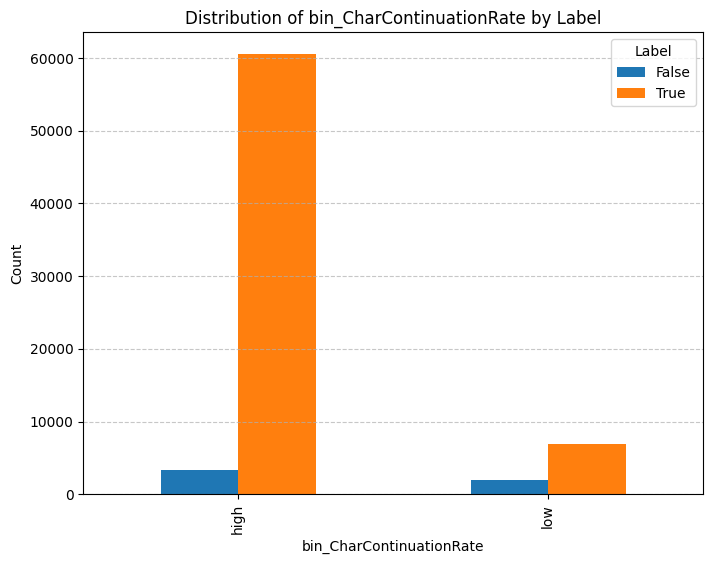

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


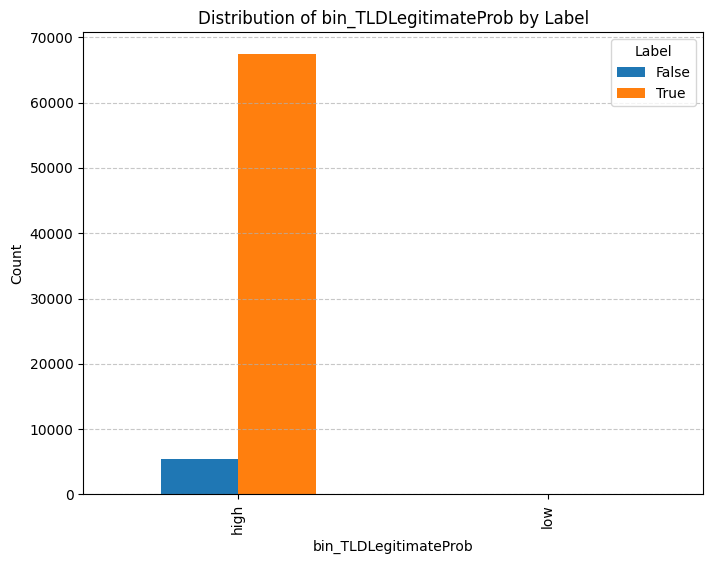

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


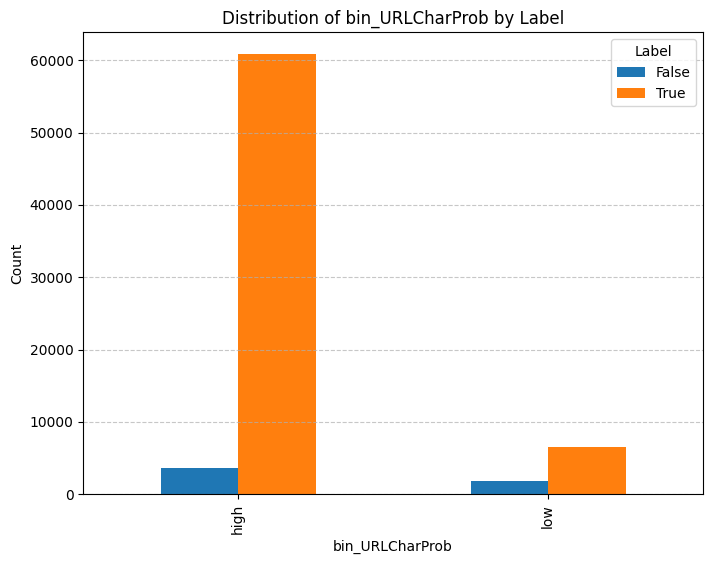

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


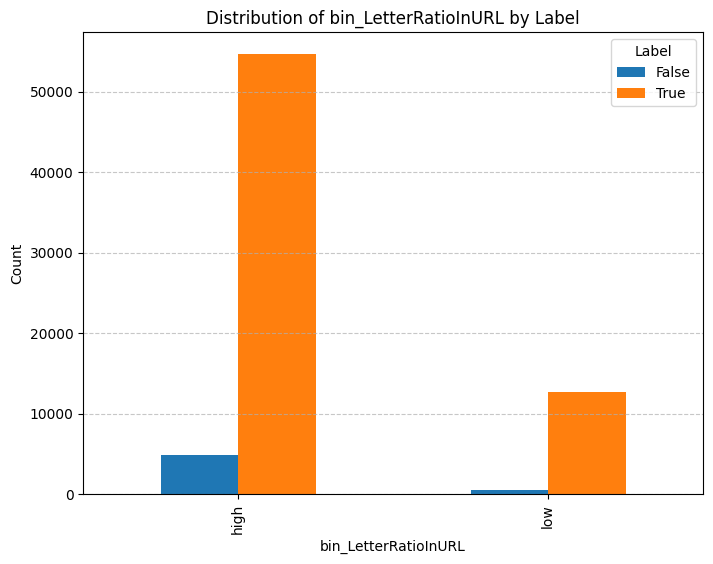

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


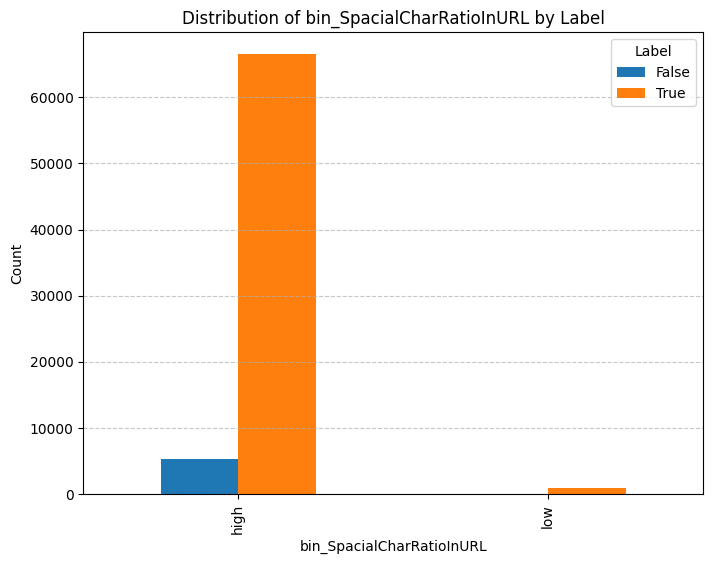

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


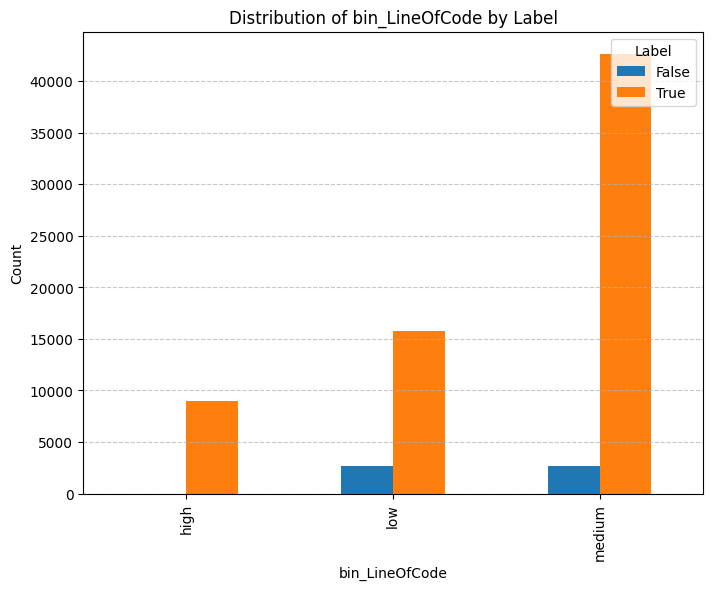

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


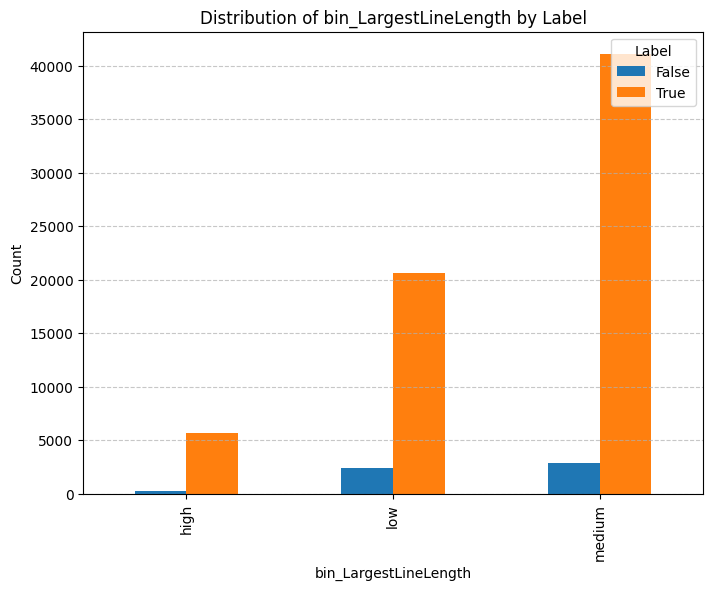

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


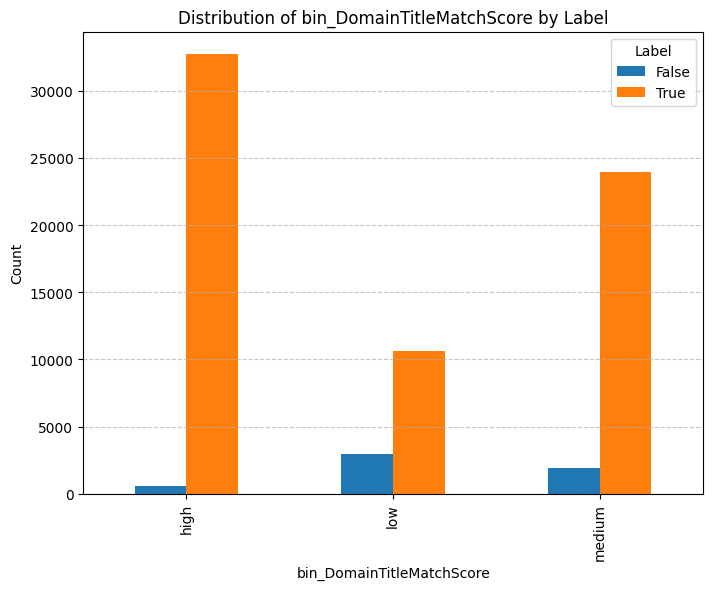

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


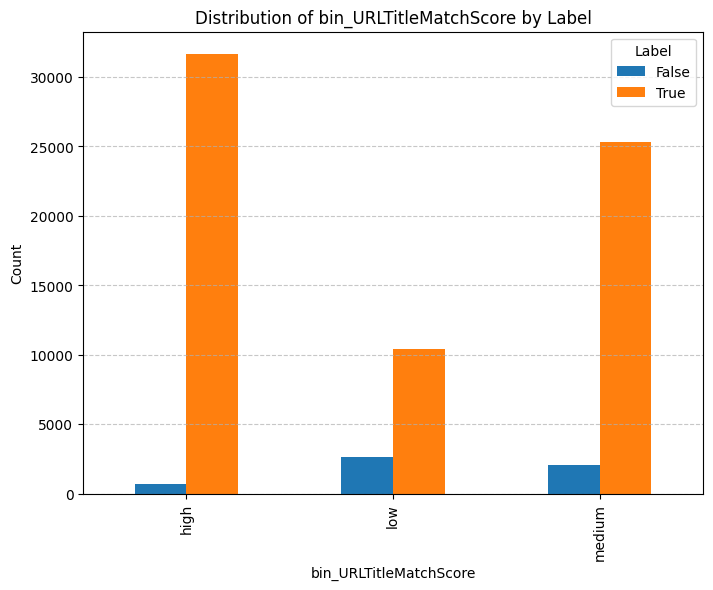

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


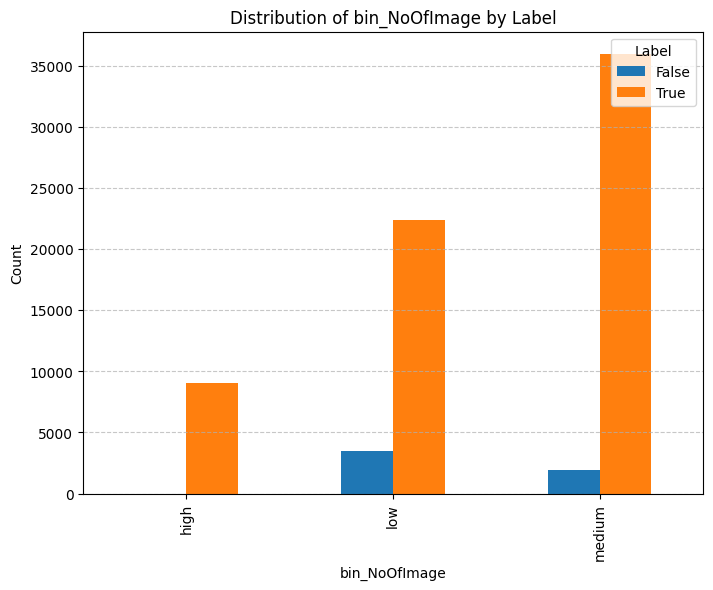

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


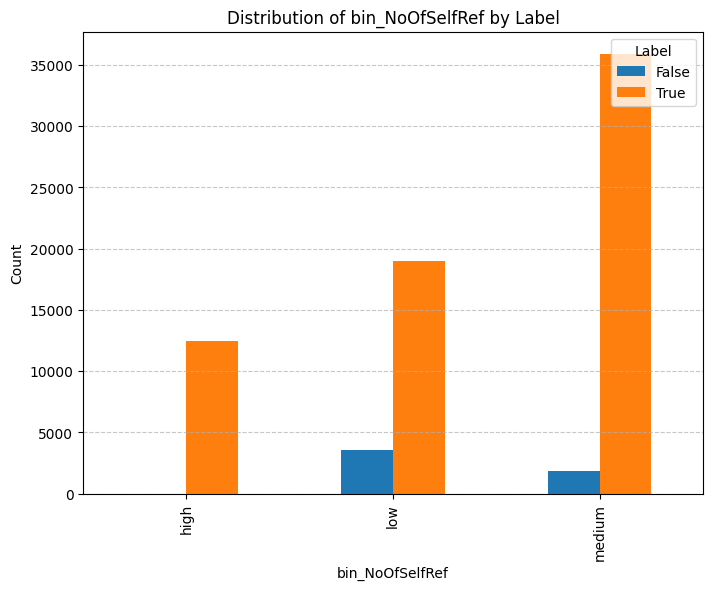

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13104\2699120337.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)


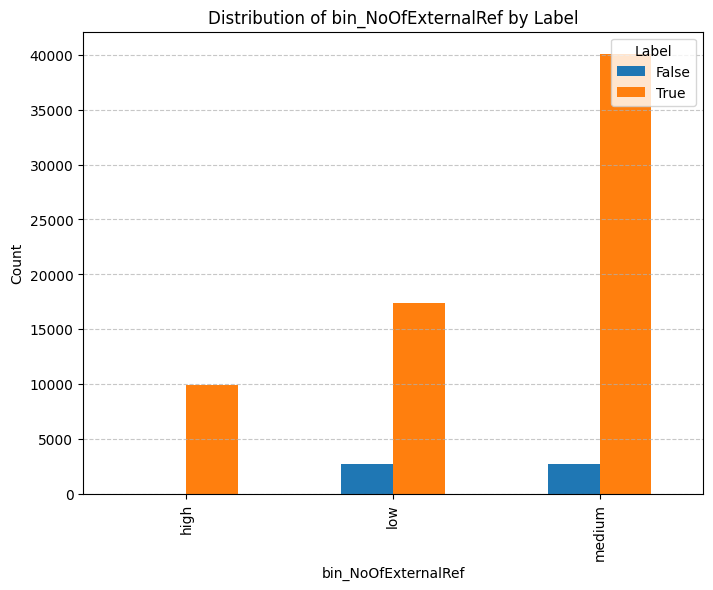

In [47]:
# List of categorical columns to analyze
categorical_columns = naming

# Plot distributions for each categorical column
for col in categorical_columns:
    distribution = train_set.groupby([col, 'label']).size().unstack(fill_value=0)
    
    # Grouped Bar Plot
    distribution.plot(kind='bar', figsize=(8, 6))
    plt.title(f'Distribution of {col} by Label')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Label', loc='upper right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

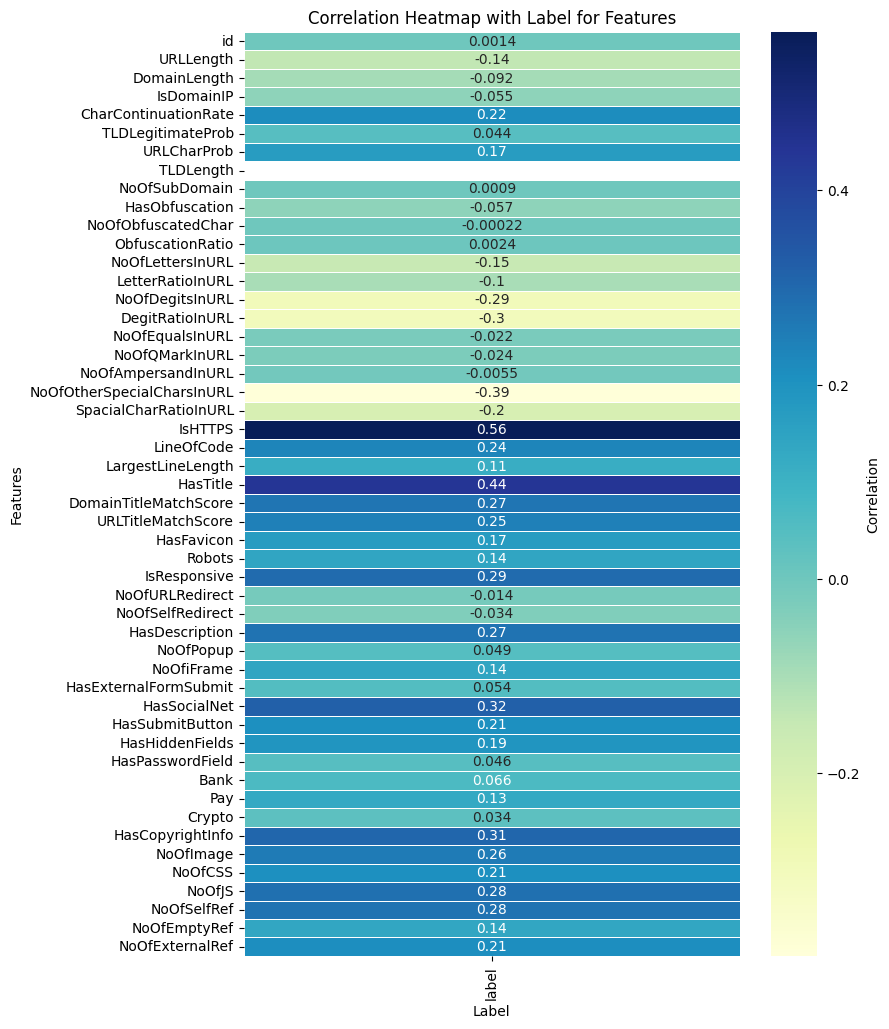

In [48]:
corr_matrix_features_label = train_set.corr(numeric_only=True)
features_label_corr = corr_matrix_features_label[['label']].drop('label')

plt.figure(figsize=(8, 12))
sns.heatmap(features_label_corr, annot=True, cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap with Label for Features')
plt.xlabel('Label')
plt.ylabel('Features')
plt.xticks(rotation=90)
plt.show()

## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [49]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [50]:
class NumericalFeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.numerical_columns = []

    def fit(self, X, y=None):
        self.numerical_columns = X.select_dtypes(include=['Int64', 'float64']).columns
        self.scaler.fit(X[self.numerical_columns])
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed[self.numerical_columns] = self.scaler.transform(X_transformed[self.numerical_columns])
        return X_transformed

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [51]:
class CategoricalFeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        self.categorical_columns = []

    def fit(self, X):
        self.categorical_columns = X.select_dtypes(include=['category']).columns 
        self.encoder.fit(X[self.categorical_columns])
        return self

    def transform(self, X):
        encoded_data = pd.DataFrame(
            self.encoder.transform(X[self.categorical_columns]),
            columns=self.encoder.get_feature_names_out(self.categorical_columns),
            index=X.index
        )
        return pd.concat([X.drop(columns=self.categorical_columns), encoded_data], axis=1) #drop column original lalu membuat column baru dengan nama gabungan

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [52]:
train_set.nunique()


id                           72823
FILENAME                     43078
URL                          72823
URLLength                       14
Domain                       36286
                             ...  
bin_DomainTitleMatchScore        3
bin_URLTitleMatchScore           3
bin_NoOfImage                    3
bin_NoOfSelfRef                  3
bin_NoOfExternalRef              3
Length: 68, dtype: int64

In [53]:
train_set['bin_TLDLegitimateProb']

3716      high
95917     high
103893    high
23596     high
24006     high
          ... 
87498     high
54886     high
110268    high
131932    high
121958    high
Name: bin_TLDLegitimateProb, Length: 72823, dtype: category
Categories (2, object): ['high', 'low']

In [54]:
# Get the numerical columns that are binary (0/1) and non-binary
numerical_train_set_01 = train_set.select_dtypes(include='boolean').columns
numerical_train_set_not01 = train_set.select_dtypes(include=['number']).columns

# Get categorical columns
cat_ts = train_set.select_dtypes(include=['category']).columns

print(numerical_train_set_not01)

# Function to calculate imbalance ratio
def calculate_imbalance_ratio(column):
    # Calculate class distribution
    j = train_set[column].nunique()
    class_counts = train_set[column].value_counts()
    if j == 2:  # Only calculate for binary columns (0/1)
        ratio = class_counts.max() / class_counts.min()
        return ratio
    return None  # For non-binary columns

# For contole columns, calculate imbalance ratio
print("Imbalance Ratios for boolean Columns:")
for col in numerical_train_set_01:
    ratio = calculate_imbalance_ratio(col)
    if ratio is not None:
        print(f"{col}: {ratio}")

# For binary columns, calculate imbalance ratio
print("\nImbalance Ratios for Numerical Columns:")
for col in numerical_train_set_not01:
    ratio = calculate_imbalance_ratio(col)
    if ratio is not None:
        print(f"{col}: {ratio}")

# For categorical columns, calculate imbalance ratio
print("\nImbalance Ratios for Categorical Columns:")
for col in cat_ts:
    ratio = calculate_imbalance_ratio(col)
    if ratio is not None:
        print(f"{col}: {ratio}")


Index(['id', 'URLLength', 'DomainLength', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL',
       'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL',
       'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL',
       'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode',
       'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS',
       'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'],
      dtype='object')
Imbalance Ratios for boolean Columns:
IsDomainIP: 4044.722222222222
HasObfuscation: 3831.7894736842104
IsHTTPS: 39.27820796460177
HasTitle: 58.78899835796388
HasFavicon: 2.680531689073082
Robots: 2.882029958953036
IsResponsive: 6.625445026178011
NoOfURLRedirect: 14.813897937024972
NoOfSelfRedirect: 67.2502343017807
HasDescription: 4.21505299341163
HasExternalF

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [55]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [56]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [57]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [58]:
# Type your code here

## B. Naive Bayes

In [59]:
# Type your code here

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [60]:
# Type your code here

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [61]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`